In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment

import utilities as util

In [2]:
from scipy.signal import iirfilter

In [3]:
fs_bells, wav_bells = wavfile.read('../samples/HandBells.wav')
fs_guitar, wav_guitar = wavfile.read('../samples/Guitar.wav')
fs_piano, wav_piano = wavfile.read('../samples/Piano.wav')
fs_chords, wav_chords = wavfile.read('../samples/Chords.wav')

fs_piano_note,  wav_piano_note  = wavfile.read('../samples/Piano_C_Major_Note.wav')
fs_piano_scale, wav_piano_scale = wavfile.read('../samples/Piano_C_Major_Scale.wav')
fs_guitar_note,  wav_guitar_note  = wavfile.read('../samples/Guitar_C_Major_Note.wav')
fs_guitar_scale, wav_guitar_scale = wavfile.read('../samples/Guitar_C_Major_Scale.wav')
fs_trombone_note,  wav_trombone_note  = wavfile.read('../samples/Trombone_C_Major_Note.wav')
fs_trombone_scale, wav_trombone_scale = wavfile.read('../samples/Trombone_C_Major_Scale.wav')

In [4]:
wav_bells  = wav_bells.astype(np.double)
wav_guitar = wav_guitar.astype(np.double)
wav_piano  = wav_piano.astype(np.double)
wav_chords = wav_chords.astype(np.double)

wav_piano_note  = wav_piano_note.astype(np.double)
wav_piano_scale = wav_piano_scale.astype(np.double)
wav_guitar_note  = wav_guitar_note.astype(np.double)
wav_guitar_scale = wav_guitar_scale.astype(np.double)
wav_trombone_note  = wav_trombone_note.astype(np.double)
wav_trombone_scale = wav_trombone_scale.astype(np.double)

In [5]:
freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=16384)
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=16384)
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=16384)
freq_chords, time_chords, spectrogram_chords = sg.spectrogram(wav_chords, fs_chords, nperseg=16384)

freq_piano_note,  time_piano_note,  spectrogram_piano_note  = sg.spectrogram(wav_piano_note,  fs_piano_note,  nperseg=16384)
freq_piano_scale, time_piano_scale, spectrogram_piano_scale = sg.spectrogram(wav_piano_scale, fs_piano_scale, nperseg=16384)
freq_guitar_note,  time_guitar_note,  spectrogram_guitar_note  = sg.spectrogram(wav_guitar_note,  fs_guitar_note,  nperseg=16384)
freq_guitar_scale, time_guitar_scale, spectrogram_guitar_scale = sg.spectrogram(wav_guitar_scale, fs_guitar_scale, nperseg=16384)
freq_trombone_note,  time_trombone_note,  spectrogram_trombone_note  = sg.spectrogram(wav_trombone_note,  fs_trombone_note,  nperseg=16384)
freq_trombone_scale, time_trombone_scale, spectrogram_trombone_scale = sg.spectrogram(wav_trombone_scale, fs_trombone_scale, nperseg=16384)

In [6]:
argsort_bells  = np.argsort(spectrogram_bells,  axis=0)
argsort_guitar = np.argsort(spectrogram_guitar, axis=0)
argsort_piano  = np.argsort(spectrogram_piano,  axis=0)
argsort_chords = np.argsort(spectrogram_chords, axis=0)

argsort_piano_note  = np.argsort(spectrogram_piano_note,  axis=0)
argsort_piano_scale = np.argsort(spectrogram_piano_scale, axis=0)
argsort_guitar_note  = np.argsort(spectrogram_guitar_note,  axis=0)
argsort_guitar_scale = np.argsort(spectrogram_guitar_scale, axis=0)
argsort_trombone_note  = np.argsort(spectrogram_trombone_note,  axis=0)
argsort_trombone_scale = np.argsort(spectrogram_trombone_scale, axis=0)

In [7]:
corr_bells,  nf_bells  = util.make_corrections(spectrogram_bells,  freq_bells)
corr_guitar, nf_guitar = util.make_corrections(spectrogram_guitar, freq_guitar)
corr_piano,  nf_piano  = util.make_corrections(spectrogram_piano,  freq_piano)
corr_chords, nf_chords = util.make_corrections(spectrogram_chords, freq_chords)

corr_piano_note,  nf_piano_note  = util.make_corrections(spectrogram_piano_note,  freq_piano_note)
corr_piano_scale, nf_piano_scale = util.make_corrections(spectrogram_piano_scale, freq_piano_scale)
corr_guitar_note,  nf_guitar_note  = util.make_corrections(spectrogram_guitar_note,  freq_guitar_note)
corr_guitar_scale, nf_guitar_scale = util.make_corrections(spectrogram_guitar_scale, freq_guitar_scale)
corr_trombone_note,  nf_trombone_note  = util.make_corrections(spectrogram_trombone_note, freq_trombone_note)
corr_trombone_scale, nf_trombone_scale = util.make_corrections(spectrogram_trombone_scale, freq_trombone_scale)

In [8]:
argsort_bells2  = np.argsort(corr_bells,  axis=0)
argsort_guitar2 = np.argsort(corr_guitar, axis=0)
argsort_piano2  = np.argsort(corr_piano,  axis=0)
argsort_chords2 = np.argsort(corr_chords, axis=0)

argsort_piano_note2  = np.argsort(corr_piano_note,  axis=0)
argsort_piano_scale2 = np.argsort(corr_piano_scale, axis=0)
argsort_guitar_note2  = np.argsort(corr_guitar_note,  axis=0)
argsort_guitar_scale2 = np.argsort(corr_guitar_scale, axis=0)
argsort_trombone_note2  = np.argsort(corr_trombone_note,  axis=0)
argsort_trombone_scale2 = np.argsort(corr_trombone_scale, axis=0)

In [28]:
# Butterworth Filter order selection
# Lowest order Butterworth filter
# Loses no more than gpass dB in the passband
# At least gstop dB attenuation in the stopband

wp = [0.005, 0.8]
ws = [0.0009, 0.907]
gpass = 3.0
gstop = 40.0
# analog
b_ord, b_wn = sg.buttord(wp, ws, gpass, gstop)

In [29]:
b_wn
# Butterworth natural frequency

array([0.00499803, 0.80007365])

In [30]:
b_ord
# Lowest order for a Betterworth filter which meets specs

6

In [32]:
# Butterworth filter 
ret_a, ret_b = sg.butter(
    N=b_ord, 
    Wn=b_wn,
    btype='bandpass')

In [33]:
ret_a
# Denominator of polynomials for the iir filter

array([ 0.2803189 ,  0.        , -1.68191337,  0.        ,  4.20478343,
        0.        , -5.60637791,  0.        ,  4.20478343,  0.        ,
       -1.68191337,  0.        ,  0.2803189 ])

In [34]:
ret_b
# Numerator of polynomials for the iir filter

array([ 1.        , -2.36278163, -0.89259786,  4.56185179,  1.16486847,
       -5.25486818, -1.21454835,  3.40447584,  0.9821196 , -1.21866916,
       -0.43409055,  0.18566122,  0.07857883])

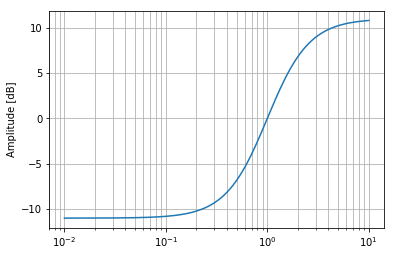

In [35]:
w, h = sg.freqs(ret_b, ret_a)
# Angular frequencies at which h was computed.
# Frequency response

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_xscale('log')
ax.set_ylabel('Amplitude [dB]')
# ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [36]:
h.shape

(200,)

In [37]:
w.shape

(200,)

In [38]:
new_wav = sg.filtfilt(ret_b, ret_a, wav_guitar_note)

In [39]:
new_freq_guitar_note, new_time_guitar_note, new_spectrogram_guitar_note = sg.spectrogram(new_wav,  fs_guitar_note,  nperseg=16384)


/Users/Peeke/Honors/.env/lib/python3.6/site-packages/scipy/signal/spectral.py:1649: RuntimeWarning: overflow encountered in multiply
  result = np.conjugate(result) * result
/Users/Peeke/Honors/.env/lib/python3.6/site-packages/scipy/signal/spectral.py:1649: RuntimeWarning: invalid value encountered in multiply
  result = np.conjugate(result) * result
/Users/Peeke/Honors/.env/lib/python3.6/site-packages/scipy/signal/spectral.py:1651: RuntimeWarning: invalid value encountered in multiply
  result *= scale
/Users/Peeke/Honors/.env/lib/python3.6/site-packages/scipy/signal/spectral.py:1657: RuntimeWarning: invalid value encountered in multiply
  result[..., 1:-1] *= 2


In [40]:
new_argsort_guitar_note  = np.argsort(new_spectrogram_guitar_note,  axis=0)
new_corr_guitar_note,  new_nf_guitar_note  = util.make_corrections(new_spectrogram_guitar_note,  new_freq_guitar_note)

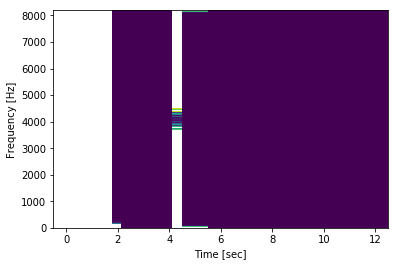

In [41]:
util.display_spec(time = new_time_guitar_note, freq=new_freq_guitar_note, spec=new_spectrogram_guitar_note)

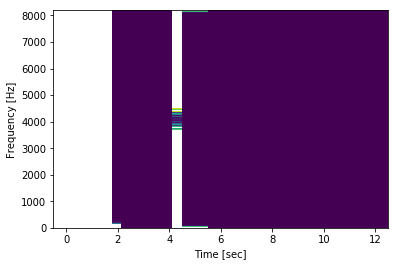

In [42]:
util.display_spec(time = new_time_guitar_note, freq=new_freq_guitar_note, spec=new_spectrogram_guitar_note)

In [46]:
np.nanmin(new_spectrogram_guitar_note)

1.111051057586469e+206

In [47]:
np.nanmax(new_spectrogram_guitar_note)

inf

In [45]:
spectrogram_guitar_note.min()

1.0260605113225841e-09

In [182]:
new_spectrogram_guitar_note

array([[3.23744891e+120, 1.03387829e+120, 3.90684020e+117, ...,
        4.62824111e+102, 1.47865983e+101, 3.24477082e+099],
       [1.21866553e+119, 3.89180454e+118, 1.47064297e+116, ...,
        1.74219828e+101, 5.56608556e+099, 1.22142170e+098],
       [9.52082447e+118, 3.04047229e+118, 1.14893982e+116, ...,
        1.36109240e+101, 4.34850434e+099, 9.54235702e+097],
       ...,
       [8.33654185e+127, 1.26156767e+127, 4.39253756e+124, ...,
        7.40150038e+109, 2.42005582e+108, 3.48013127e+106],
       [6.16173846e+128, 4.39968312e+127, 1.32664732e+125, ...,
        2.13997299e+110, 9.33466928e+108, 1.32729459e+107],
       [2.81167341e+129, 1.03846958e+128, 4.32594853e+125, ...,
        1.02743783e+111, 3.46437391e+109, 2.13368213e+107]])

In [183]:
new_argsort_guitar_note

array([[   8,   12,   12, ...,   12,   12,   12],
       [  12,   20,   20, ...,   20,   20,   20],
       [  16,   28,   28, ...,   28,   28,   28],
       ...,
       [8190, 8190, 8190, ..., 8190, 8190, 8190],
       [8191, 8191, 8191, ..., 8191, 8191, 8191],
       [8192, 8192, 8192, ..., 8192, 8192, 8192]])

In [184]:
new_freq_guitar_note[new_argsort_guitar_note]

array([[2.15332031e+01, 3.22998047e+01, 3.22998047e+01, ...,
        3.22998047e+01, 3.22998047e+01, 3.22998047e+01],
       [3.22998047e+01, 5.38330078e+01, 5.38330078e+01, ...,
        5.38330078e+01, 5.38330078e+01, 5.38330078e+01],
       [4.30664062e+01, 7.53662109e+01, 7.53662109e+01, ...,
        7.53662109e+01, 7.53662109e+01, 7.53662109e+01],
       ...,
       [2.20446167e+04, 2.20446167e+04, 2.20446167e+04, ...,
        2.20446167e+04, 2.20446167e+04, 2.20446167e+04],
       [2.20473083e+04, 2.20473083e+04, 2.20473083e+04, ...,
        2.20473083e+04, 2.20473083e+04, 2.20473083e+04],
       [2.20500000e+04, 2.20500000e+04, 2.20500000e+04, ...,
        2.20500000e+04, 2.20500000e+04, 2.20500000e+04]])

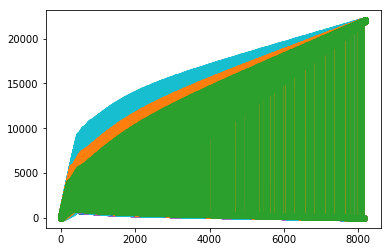

In [187]:
plt.plot(new_freq_guitar_note[new_argsort_guitar_note], 'o-')

In [159]:
import tensorflow as tf

## create a graph
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32,
                       shape=(None), name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')

    z = w*x + b

    init = tf.global_variables_initializer()

In [160]:
## create a session and pass in graph g
with tf.Session(graph=g) as sess:
    ## initialize w and b:
    sess.run(init)
    ## evaluate z:
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f'%(
              t, sess.run(z, feed_dict={x:t})))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [161]:
## create a session and pass in graph g
with tf.Session(graph=g) as sess:
    print(sess.run(z, feed_dict={x:[1., 2., 3.]}))

FailedPreconditionError: Attempting to use uninitialized value bias
	 [[Node: bias/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](bias)]]

Caused by op 'bias/read', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-308cca10c665>", line 9, in <module>
    b = tf.Variable(0.7, name='bias')
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 259, in __init__
    constraint=constraint)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 422, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 80, in identity
    return gen_array_ops.identity(input, name=name)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3264, in identity
    "Identity", input=input, name=name)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/Users/Peeke/Honors/.env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value bias
	 [[Node: bias/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](bias)]]


In [162]:
import numpy as np

g = tf.Graph()
with g.as_default():
    x = tf.placeholder(dtype=tf.float32,
                       shape=(None, 2, 3),
                       name='input_x')

    x2 = tf.reshape(x, shape=(-1, 6),
                    name='x2')

    ## calculate the sum of each column
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')

    ## calculate the mean of each column
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')

with tf.Session(graph=g) as sess:
    x_array = np.arange(18).reshape(3, 2, 3)

    print('input shape: ', x_array.shape)
    print('Reshaped:\n',
          sess.run(x2, feed_dict={x:x_array}))
    print('Column Sums:\n',
          sess.run(xsum, feed_dict={x:x_array}))
    print('Column Means:\n',
          sess.run(xmean, feed_dict={x:x_array}))

input shape:  (3, 2, 3)
Reshaped:
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums:
 [18. 21. 24. 27. 30. 33.]
Column Means:
 [ 6.  7.  8.  9. 10. 11.]


In [ ]:
# Gradient Descent Optimizer
def build(self):
        ## define placeholders for inputs
        self.X = tf.placeholder(dtype=tf.float32,
                                shape=(None, self.x_dim),
                                name='x_input')
        self.y = tf.placeholder(dtype=tf.float32,
                                shape=(None),
                                name='y_input')
        print(self.X)
        print(self.y)
        ## define weight matrix and bias vector
        w = tf.Variable(tf.zeros(shape=(1)),
                        name='weight')
        b = tf.Variable(tf.zeros(shape=(1)),
                        name="bias")
        print(w)
        print(b)

        self.z_net = tf.squeeze(w*self.X + b,
                                name='z_net')
        print(self.z_net)
        
        sqr_errors = tf.square(self.y - self.z_net,
                               name='sqr_errors')
        print(sqr_errors)
        self.mean_cost = tf.reduce_mean(sqr_errors,
                                        name='mean_cost')
        
        optimizer = tf.train.GradientDescentOptimizer(
                    learning_rate=self.learning_rate,
                    name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)